<a href="https://colab.research.google.com/github/PajrulPalah/project_internship_indekstat/blob/main/Analisa_Data_Magang_Menggunakan_Query_SQL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modul Untuk Menganlisis Data Menggunakan Query di Postgree SQL**

### Created  by: Muhammad Pajrul Palah

Sebelum mengcopy script di bawah ini sebagai reminder dalam running query harus terkoneksasi antara **dbeaver** dan **postgree** kemudian dataset **data_magang_dprd_kab** harus sudah tersimpan di local database aplikasi software tersebut.

Dan ketika running query harus dilakukan satu persatu yang diakiri tanda (;) dengan cara memblok setiap satu query kemudian menjalanknya.


##**Seperti pada gambar berikut :**##


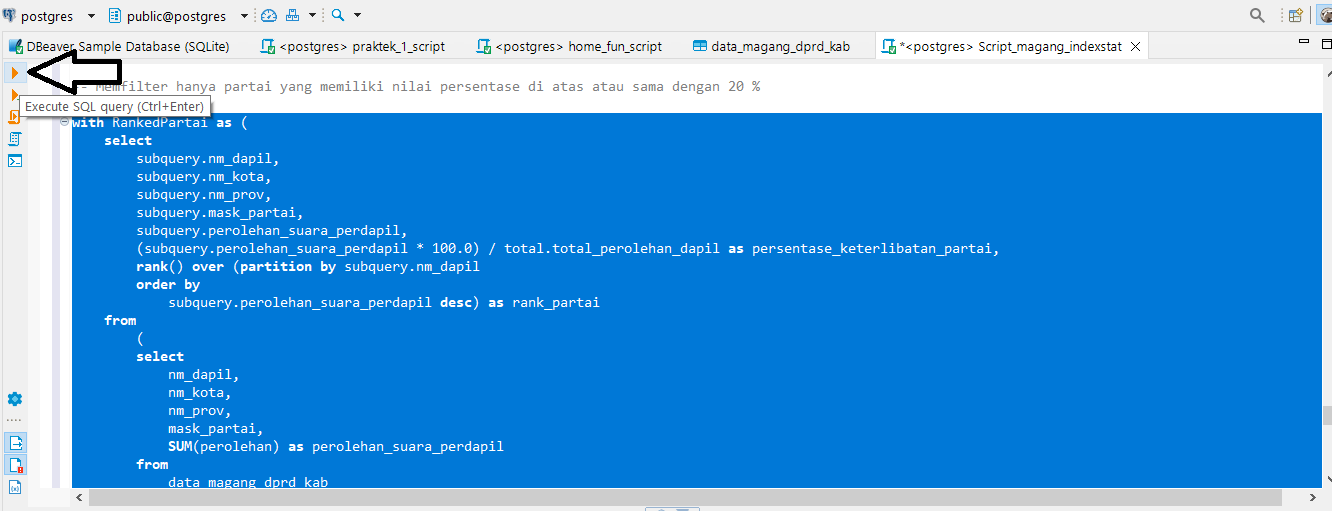

Harap Perhatikan Setiap Komentar Yang Diawali (- -) Sebagai Tajuk Pembahasahan Terkait Hasil Query Yang Akan Dimunculkan

```(r)

-- Analisa data berdasarkan jumlah kabupaten dan kota berdasarkan jumlah partai yang terlibat
-- Mengecek apakah terdapat nilai null pada setiap dataset
-- created by : Muhammad Pajrul Palah

select
	*
from
	data_magang_dprd_kab
where
	nm_dapil is null
	or nm_desa is null
	or nm_kec is null
	or nm_kota is null
	or nm_prov is null
	or mask_partai is null
	or perolehan is null;

-- Menampilkan baris dengan kolom 'nm_dapil' yang kosong atau NULL
select
	*
from
	data_magang_dprd_kab
where
	nm_dapil is null
	or nm_dapil = '';

-- Menampilkan baris dengan kolom 'nm_desa' yang kosong atau NULL
select
	*
from
	data_magang_dprd_kab
where
	nm_desa is null
	or nm_desa = '';

-- Menampilkan baris dengan kolom 'nm_kec' yang kosong atau NULL
select
	*
from
	data_magang_dprd_kab
where
	nm_kec is null
	or nm_kec = '';

-- Menampilkan baris dengan kolom 'nm_kota' yang kosong atau NULL
select
	*
from
	data_magang_dprd_kab
where
	nm_kota is null
	or nm_kota = '';

-- Menampilkan baris dengan kolom 'nm_prov' yang kosong atau NULL
select
	*
from
	data_magang_dprd_kab
where
	nm_prov is null
	or nm_prov = '';

-- Menampilkan baris dengan kolom 'mask_partai' yang kosong atau NULL
select
	*
from
	data_magang_dprd_kab
where
	mask_partai is null
	or mask_partai = '';

-- Menampilkan baris dengan kolom 'perolehan' yang kosong atau NULL
select
	*
from
	data_magang_dprd_kab
where
	perolehan is null
	or perolehan = 0;

-- Menghitung ada berapa nilai 0 dalam seluruh row di database
select
	COUNT(*) as total_perolehan_kosong
from
	data_magang_dprd_kab
where
	perolehan = 0;

-- Kemudian Melihat tipe data setiap kolom variabel
select
	column_name,
	data_type
from
	information_schema.columns
where
	table_name = 'data_magang_dprd_kab';

alter table data_magang_dprd_kab
alter column perolehan type numeric;

-- Kemudian Melihat ulang tipe data setiap kolom variabel
select
	column_name,
	data_type
from
	information_schema.columns
where
	table_name = 'data_magang_dprd_kab';

-- Menganalisa dataset
-- Melihat total partai yang terlibat dari seluruh wilayah indonesia
select distinct mask_partai
from data_magang_dprd_kab dmdk

-- Keterlibatan partai di setiap kabupaten kota (Menjumlah total partai politik yang terlibat dalam satu wilayah kabupaten atau kota)
select
	nm_kota,
	nm_prov,
	COUNT(distinct mask_partai) as total_partai_terlibat
from
	data_magang_dprd_kab
group by
	nm_kota,
	nm_prov

-- Mengelompokan dan menjumlahkan total perolehan suara di setiap kecamatan
select
	nm_kec,
	nm_kota,
	nm_prov,
	mask_partai,
	SUM(perolehan) as total_perolehan_suara
from
	data_magang_dprd_kab
group by
	nm_kec,
	nm_kota,
	nm_prov,
	mask_partai
order by
	nm_kota,
	mask_partai;

-- Mengelompokan dan menjumlahkan total perolehan suara di setiap kabupaten/kota
select
	nm_kota,
	nm_prov,
	mask_partai,
	SUM(perolehan) as total_perolehan_suara
from
	data_magang_dprd_kab
group by
	nm_kota,
	nm_prov,
	mask_partai
order by
	nm_kota,
	mask_partai;

-- Mengelompokan dan menjumlahkan total perolehan suara di setiap provinsi
select
	nm_prov,
	mask_partai,
	SUM(perolehan) as total_perolehan_suara
from
	data_magang_dprd_kab
group by
	nm_prov,
	mask_partai
order by
	nm_prov,
	mask_partai;

-- Melihat total persentase keterlibatan partai di setiap wilayah kabupaten/kota
-- Menggunakan Nested Query
select
	subquery.nm_kota,
	subquery.nm_prov,
	subquery.mask_partai,
	subquery.total_perolehan_suara,
	(subquery.total_perolehan_suara * 100.0) / total.total_perolehan_kota as persentase_keterlibatan_partai
from
	(
	select
		nm_kota,
		nm_prov,
		mask_partai,
		SUM(perolehan) as total_perolehan_suara
	from
		data_magang_dprd_kab
	group by
		nm_kota,
		nm_prov,
		mask_partai) subquery
join
    (
	select
		nm_kota,
		SUM(perolehan) as total_perolehan_kota
	from
		data_magang_dprd_kab
	group by
		nm_kota) total
on
	subquery.nm_kota = total.nm_kota
order by
  subquery.nm_kota, subquery.mask_partai;

-- Melihat total persentase keterlibatan partai di setiap wilayah kabupaten/kota dari urutan perolehan suara tertinggi
select
	subquery.nm_kota,
	subquery.nm_prov,
	subquery.mask_partai,
	subquery.total_perolehan_suara,
	(subquery.total_perolehan_suara * 100.0) / total.total_perolehan_kota as persentase_keterlibatan_partai
from
	(
	select
		nm_kota,
		nm_prov,
		mask_partai,
		SUM(perolehan) as total_perolehan_suara
	from
		data_magang_dprd_kab
	group by
		nm_kota,
		nm_prov,
		mask_partai) subquery
join
    (
	select
		nm_kota,
		SUM(perolehan) as total_perolehan_kota
	from
		data_magang_dprd_kab
	group by
		nm_kota) total
on
	subquery.nm_kota = total.nm_kota
order by
    subquery.nm_kota,
subquery.total_perolehan_suara desc,
subquery.mask_partai;

-- Membuat kolom baru dengan urutan dari rank tertinggi di setiap wilayah kabupaten kota berdasarkan perolehan suara dari masing-masing partai
-- Menggunakan Nested Query, Sub Query dan Windows Functions
with RankedPartai as (
select
	subquery.nm_kota,
	subquery.nm_prov,
	subquery.mask_partai,
	subquery.total_perolehan_suara,
	(subquery.total_perolehan_suara * 100.0) / total.total_perolehan_kota as persentase_keterlibatan_partai,
	rank() over (partition by subquery.nm_kota
order by
	subquery.total_perolehan_suara desc) as rank_partai
from
	(
	select
		nm_kota,
		nm_prov,
		mask_partai,
		SUM(perolehan) as total_perolehan_suara
	from
		data_magang_dprd_kab
	group by
		nm_kota,
		nm_prov,
		mask_partai
        ) subquery
join
        (
	select
		nm_kota,
		SUM(perolehan) as total_perolehan_kota
	from
		data_magang_dprd_kab
	group by
		nm_kota
        ) total
    on
	subquery.nm_kota = total.nm_kota
)
select
	*
from
	RankedPartai
order by
	nm_kota,
	rank_partai;

-- Setelah diurutkan berdasarkan rank masing-masing kemudian untuk mengechek dari setiap kabupaten/kota yang memiliki urutan rank partai untuk posisi pertama
-- Menambahkan Fungsi Common Table Expression (CTE)
with RankedParties as (
select
	nm_kota,
	nm_prov,
	mask_partai,
	SUM(perolehan) as total_perolehan_suara,
	rank() over (partition by nm_kota
order by
	SUM(perolehan) desc) as rank_partai
from
	data_magang_dprd_kab
group by
	nm_kota,
	nm_prov,
	mask_partai
),
TotalPerolehan as (
select
	nm_kota,
	SUM(perolehan) as total_perolehan_kota
from
	data_magang_dprd_kab
group by
	nm_kota
)
select
	RankedParties.nm_kota,
	RankedParties.nm_prov,
	RankedParties.mask_partai,
	RankedParties.total_perolehan_suara,
	(RankedParties.total_perolehan_suara * 100.0) / TotalPerolehan.total_perolehan_kota as persentase_keterlibatan_partai,
	RankedParties.rank_partai
from
	RankedParties
join TotalPerolehan
on
	RankedParties.nm_kota = TotalPerolehan.nm_kota
where
	RankedParties.rank_partai = 1;


-- Mencari nilai basis partai di setiap kabupaten/kota yang nilainya di atas atau sama dengan 80%
with RankedParties as (
select
	nm_kota,
	nm_prov,
	mask_partai,
	SUM(perolehan) as total_perolehan_suara,
	rank() over (partition by nm_kota
order by
	SUM(perolehan) desc) as rank_partai
from
	data_magang_dprd_kab
group by
	nm_kota,
	nm_prov,
	mask_partai
),
TotalPerolehan as (
select
	nm_kota,
	SUM(perolehan) as total_perolehan_kota
from
	data_magang_dprd_kab
group by
	nm_kota
)
select
	RankedParties.nm_kota,
	RankedParties.nm_prov,
	RankedParties.mask_partai,
	RankedParties.total_perolehan_suara,
	(RankedParties.total_perolehan_suara * 100.0) / TotalPerolehan.total_perolehan_kota as persentase_keterlibatan_partai,
	RankedParties.rank_partai
from
	RankedParties
join TotalPerolehan
on
RankedParties.nm_kota = TotalPerolehan.nm_kota
where
RankedParties.rank_partai = 1
and (RankedParties.total_perolehan_suara * 100.0) / TotalPerolehan.total_perolehan_kota >= 80;

-- Dari hasil query ternyata tidak ada daerah berdasarkan kabupaten/kota yang lebih dari 80 persen
-- Kemudian opsi selanjutnya adalah melihat nilai persentase yang lebih dari 50%
with RankedParties as (
select
	nm_kota,
	nm_prov,
	mask_partai,
	SUM(perolehan) as total_perolehan_suara,
	rank() over (partition by nm_kota
order by
	SUM(perolehan) desc) as rank_partai
from
	data_magang_dprd_kab
group by
	nm_kota,
	nm_prov,
	mask_partai
),
TotalPerolehan as (
select
	nm_kota,
	SUM(perolehan) as total_perolehan_kota
from
	data_magang_dprd_kab
group by
	nm_kota
)
select
	RankedParties.nm_kota,
	RankedParties.nm_prov,
	RankedParties.mask_partai,
	RankedParties.total_perolehan_suara,
	(RankedParties.total_perolehan_suara * 100.0) / TotalPerolehan.total_perolehan_kota as persentase_keterlibatan_partai,
	RankedParties.rank_partai
from
	RankedParties
join TotalPerolehan
on
	RankedParties.nm_kota = TotalPerolehan.nm_kota
where
	RankedParties.rank_partai = 1
	and (RankedParties.total_perolehan_suara * 100.0) / TotalPerolehan.total_perolehan_kota >= 50;
-- Dari hasil diatas terdapat 9 kabupaten/kota yang nilai peroleh suaranya di atas 50 persen (%)


 -- Setelah mengetahui urutan partai untuk posisi pertama dan mengetahui nilai persentase di atas 80% atau 50 % di setiap kabupaten/kota
 -- Langkah selanjutnya mengetahui urutan berdasarkan nama provinsi
with ranked_partai as (
select
	subquery.nm_prov,
	subquery.mask_partai,
	subquery.total_perolehan_suara,
	(subquery.total_perolehan_suara * 100.0) / total.total_perolehan_prov as persentase_keterlibatan_partai,
	rank() over (partition by subquery.nm_prov
order by
	subquery.total_perolehan_suara desc) as rank_partai
from
	(
	select
		nm_prov,
		mask_partai,
		SUM(perolehan) as total_perolehan_suara
	from
		data_magang_dprd_kab
	group by
		nm_prov,
		mask_partai
        ) subquery
join
        (
	select
		nm_prov,
		SUM(perolehan) as total_perolehan_prov
	from
		data_magang_dprd_kab
	group by
		nm_prov
        ) total
    on
	subquery.nm_prov = total.nm_prov
)
select
	*
from
	ranked_partai
order by
	nm_prov,
	rank_partai;

-- Mencari Nilai setiap provinsi yang dapat dikatakan sebagai basis partai
with ranked_parties as (
select
	nm_prov,
	mask_partai,
	SUM(perolehan) as total_perolehan_suara,
	rank() over (partition by nm_prov
order by
	SUM(perolehan) desc) as rank_partai
from
	data_magang_dprd_kab
group by
	nm_prov,
	mask_partai
),
TotalPerolehan as (
select
	nm_prov,
	SUM(perolehan) as total_perolehan_prov
from
	data_magang_dprd_kab
group by
	nm_prov
)
select
	ranked_parties.nm_prov,
	ranked_parties.mask_partai,
	ranked_parties.total_perolehan_suara,
	(ranked_parties.total_perolehan_suara * 100.0) / TotalPerolehan.total_perolehan_prov as persentase_keterlibatan_partai,
	ranked_parties.rank_partai
from
	ranked_parties
join TotalPerolehan
on
ranked_parties.nm_prov = TotalPerolehan.nm_prov
where
ranked_parties.rank_partai = 1
and (ranked_parties.total_perolehan_suara * 100.0) / TotalPerolehan.total_perolehan_prov >=20;

-- Mencari total perolahan suara di provinsi bali
SELECT SUM(perolehan) AS total_suara_bali
FROM public.data_magang_dprd_kab
WHERE nm_prov = 'BALI';

SELECT nm_prov, SUM(perolehan) AS total_perolehan_suara
FROM public.data_magang_dprd_kab
GROUP BY nm_prov
ORDER BY total_perolehan_suara DESC;


-- MENGANALISA TERKAIT DATA BERDSARKAN DAPIL MASING-MASING DI SETIAP WILAYAH YANG MEMILIKI POTENSI PEROLEHAN SUARA DIATAS ATAU SAMA DENGAN 20 PERSEN
-- Memeriksa total dapil yang dalam dataset
select distinct nm_dapil
from public.data_magang_dprd_kab
order by nm_dapil asc;

select count(distinct nm_dapil)
from public.data_magang_dprd_kab;

-- Melakukan analisa total perolehan suara dan persentasenya berdasarkan dapil masing-masing
with RankedPartai as (
    select
        subquery.nm_dapil,  
        subquery.nm_kota,
        subquery.nm_prov,
        subquery.mask_partai,
        subquery.total_perolehan_suara,
        (subquery.total_perolehan_suara * 100.0) / total.total_perolehan_dapil as persentase_keterlibatan_partai,
        rank() over (partition by subquery.nm_dapil
        order by
            subquery.total_perolehan_suara desc) as rank_partai
    from
        (
        select
            nm_dapil,  
            nm_kota,
            nm_prov,
            mask_partai,
            SUM(perolehan) as total_perolehan_suara
        from
            data_magang_dprd_kab
        group by
            nm_dapil,  
            nm_kota,
            nm_prov,
            mask_partai
        ) subquery
    join
        (
        select
            nm_dapil,
            SUM(perolehan) as total_perolehan_dapil
        from
            data_magang_dprd_kab
        group by
            nm_dapil
        ) total
    on
        subquery.nm_dapil = total.nm_dapil
)
select
    *
from
    RankedPartai
order by
    nm_dapil,  
    nm_kota,
    rank_partai;

-- Memfilter hanya partai yang memiliki nilai persentase di atas atau sama dengan 20 %

with RankedPartai as (
    select
        subquery.nm_dapil,  
        subquery.nm_kota,
        subquery.nm_prov,
        subquery.mask_partai,
        subquery.perolehan_suara_perdapil,
        (subquery.perolehan_suara_perdapil * 100.0) / total.total_perolehan_dapil as persentase_keterlibatan_partai,
        rank() over (partition by subquery.nm_dapil
        order by
            subquery.perolehan_suara_perdapil desc) as rank_partai
    from
        (
        select
            nm_dapil,  
            nm_kota,
            nm_prov,
            mask_partai,
            SUM(perolehan) as perolehan_suara_perdapil
        from
            data_magang_dprd_kab
        group by
            nm_dapil,  
            nm_kota,
            nm_prov,
            mask_partai
        ) subquery
    join
        (
        select
            nm_dapil,
            SUM(perolehan) as total_perolehan_dapil
        from
            data_magang_dprd_kab
        group by
            nm_dapil
        ) total
    on
        subquery.nm_dapil = total.nm_dapil
)
select
    *
from
    RankedPartai
where
    persentase_keterlibatan_partai >= 20
order by
    nm_dapil,  
    nm_kota,
    rank_partai;

-- Untuk Mengetahui total rows yang ada pada hasil query di atas
with RankedPartai as (
    select
        subquery.nm_dapil,  
        subquery.nm_kota,
        subquery.nm_prov,
        subquery.mask_partai,
        subquery.perolehan_suara_perdapil,
        (subquery.perolehan_suara_perdapil * 100.0) / total.total_perolehan_dapil as persentase_keterlibatan_partai,
        rank() over (partition by subquery.nm_dapil
        order by
            subquery.perolehan_suara_perdapil desc) as rank_partai
    from
        (
        select
            nm_dapil,  
            nm_kota,
            nm_prov,
            mask_partai,
            SUM(perolehan) as perolehan_suara_perdapil
        from
            data_magang_dprd_kab
        group by
            nm_dapil,  
            nm_kota,
            nm_prov,
            mask_partai
        ) subquery
    join
        (
        select
            nm_dapil,
            SUM(perolehan) as total_perolehan_dapil
        from
            data_magang_dprd_kab
        group by
            nm_dapil
        ) total
    on
        subquery.nm_dapil = total.nm_dapil
)

select count(*) as total_rows
from RankedPartai
where persentase_keterlibatan_partai >= 20;

```